# Dilaw Virality EDA

In [1]:
import pandas as pd 
import numpy as np

from sklearn.preprocessing import MinMaxScaler

import matplotlib.pyplot as plt
import plotly.graph_objects as go
import seaborn as sns

## Data Prep

In [2]:
# read the dataset
df = pd.read_csv('data/ph_spotify_daily_charts_tracks.csv')
df1 = pd.read_csv('data/viral_tracks.csv')
dilaw_tracks = pd.read_csv('data/dilaw_tracks.csv')

In [3]:
# Merge the two dataframes on the common column "track_id"
merged_df = pd.merge(df1, df, on='track_id', how='inner')

# Drop the duplicate "track_name" column from the second dataframe
merged_df.drop('track_name_y', axis=1, inplace=True)

# Rename the remaining "track_name" column
merged_df.rename(columns={'track_name_x': 'track_name'}, inplace=True)


In [4]:
merged_df.head()

,date,position,track_id,track_name,artist,streams,streams_increase,position_change,viral,artist_id,...,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,2017-05-29,47,4aWmUDTfIPGksMNLV2rQP2,Despacito (Featuring Daddy Yankee),Luis Fonsi,59301,-145460.0,-46.0,True,4V8Sr092TqfHkfAA5fXXqG,...,0.786,2.0,-4.757,1.0,0.1700,0.209,0.000000,0.1120,0.8460,177.833
1,2018-01-12,47,3YQp6N0vdiLEhpqKjRcN2L,Hayaan Mo Sila (Inspired by I'm the One),Ex Battalion,58550,-137229.0,-46.0,True,2iB7AJhJmkWkkehY9ccB0j,...,0.684,5.0,-4.919,1.0,0.0569,0.718,0.000000,0.0925,0.7650,80.004
2,2020-01-12,61,1ZMiCix7XSAbfAJlEZWMCp,Falling,Harry Styles,52356,-60967.0,-37.0,True,6KImCVD70vtIoJWnq6nGn3,...,0.267,4.0,-6.502,1.0,0.0299,0.839,0.000001,0.0890,0.0592,110.011
3,2020-01-14,63,1ZMiCix7XSAbfAJlEZWMCp,Falling,Harry Styles,59463,-61556.0,-38.0,True,6KImCVD70vtIoJWnq6nGn3,...,0.267,4.0,-6.502,1.0,0.0299,0.839,0.000001,0.0890,0.0592,110.011
4,2020-01-15,64,1ZMiCix7XSAbfAJlEZWMCp,Falling,Harry Styles,59508,-61871.0,-39.0,True,6KImCVD70vtIoJWnq6nGn3,...,0.267,4.0,-6.502,1.0,0.0299,0.839,0.000001,0.0890,0.0592,110.011


In [25]:
# List of the audio features
audio_features = ['danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo']

In [6]:
# Filter Dilaw songs
dilaw = df[df['artist_name']=='Dilaw']
dilaw

,track_id,track_name,artist_id,artist_name,album_id,duration,release_date,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
4723,47OFMuRu5lzJHRbtEXPBbs,Uhaw (Tayong Lahat),6Dp4LInLyMVA2qhRqQ6AGL,Dilaw,35qpGQN1On4Un7ZUdTVQgD,241185,2022-12-16,79,0.635,0.724,5.0,-6.662,1.0,0.0716,0.280,0.000004,0.1050,0.316,135.927
4750,5SyigMsSY8uAV1m27fhnLD,Uhaw,6Dp4LInLyMVA2qhRqQ6AGL,Dilaw,432KTeJ8URaOv2GduJw7K5,267049,2022-11-18,71,0.695,0.337,2.0,-9.196,0.0,0.0419,0.846,0.000165,0.0643,0.184,122.000


In [7]:
# Filter the Uhaw song
uhaw = dilaw[dilaw["track_name"]=="Uhaw"]
uhaw

,track_id,track_name,artist_id,artist_name,album_id,duration,release_date,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
4750,5SyigMsSY8uAV1m27fhnLD,Uhaw,6Dp4LInLyMVA2qhRqQ6AGL,Dilaw,432KTeJ8URaOv2GduJw7K5,267049,2022-11-18,71,0.695,0.337,2.0,-9.196,0.0,0.0419,0.846,0.000165,0.0643,0.184,122.0


In [8]:
# Filter the Uhaw (Tayong Lahat) song
uhaw_tayo = dilaw[dilaw["track_name"]=="Uhaw (Tayong Lahat)"]
uhaw_tayo

,track_id,track_name,artist_id,artist_name,album_id,duration,release_date,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
4723,47OFMuRu5lzJHRbtEXPBbs,Uhaw (Tayong Lahat),6Dp4LInLyMVA2qhRqQ6AGL,Dilaw,35qpGQN1On4Un7ZUdTVQgD,241185,2022-12-16,79,0.635,0.724,5.0,-6.662,1.0,0.0716,0.28,0.000004,0.105,0.316,135.927


## Audio Features of Uhaw

### Histogram

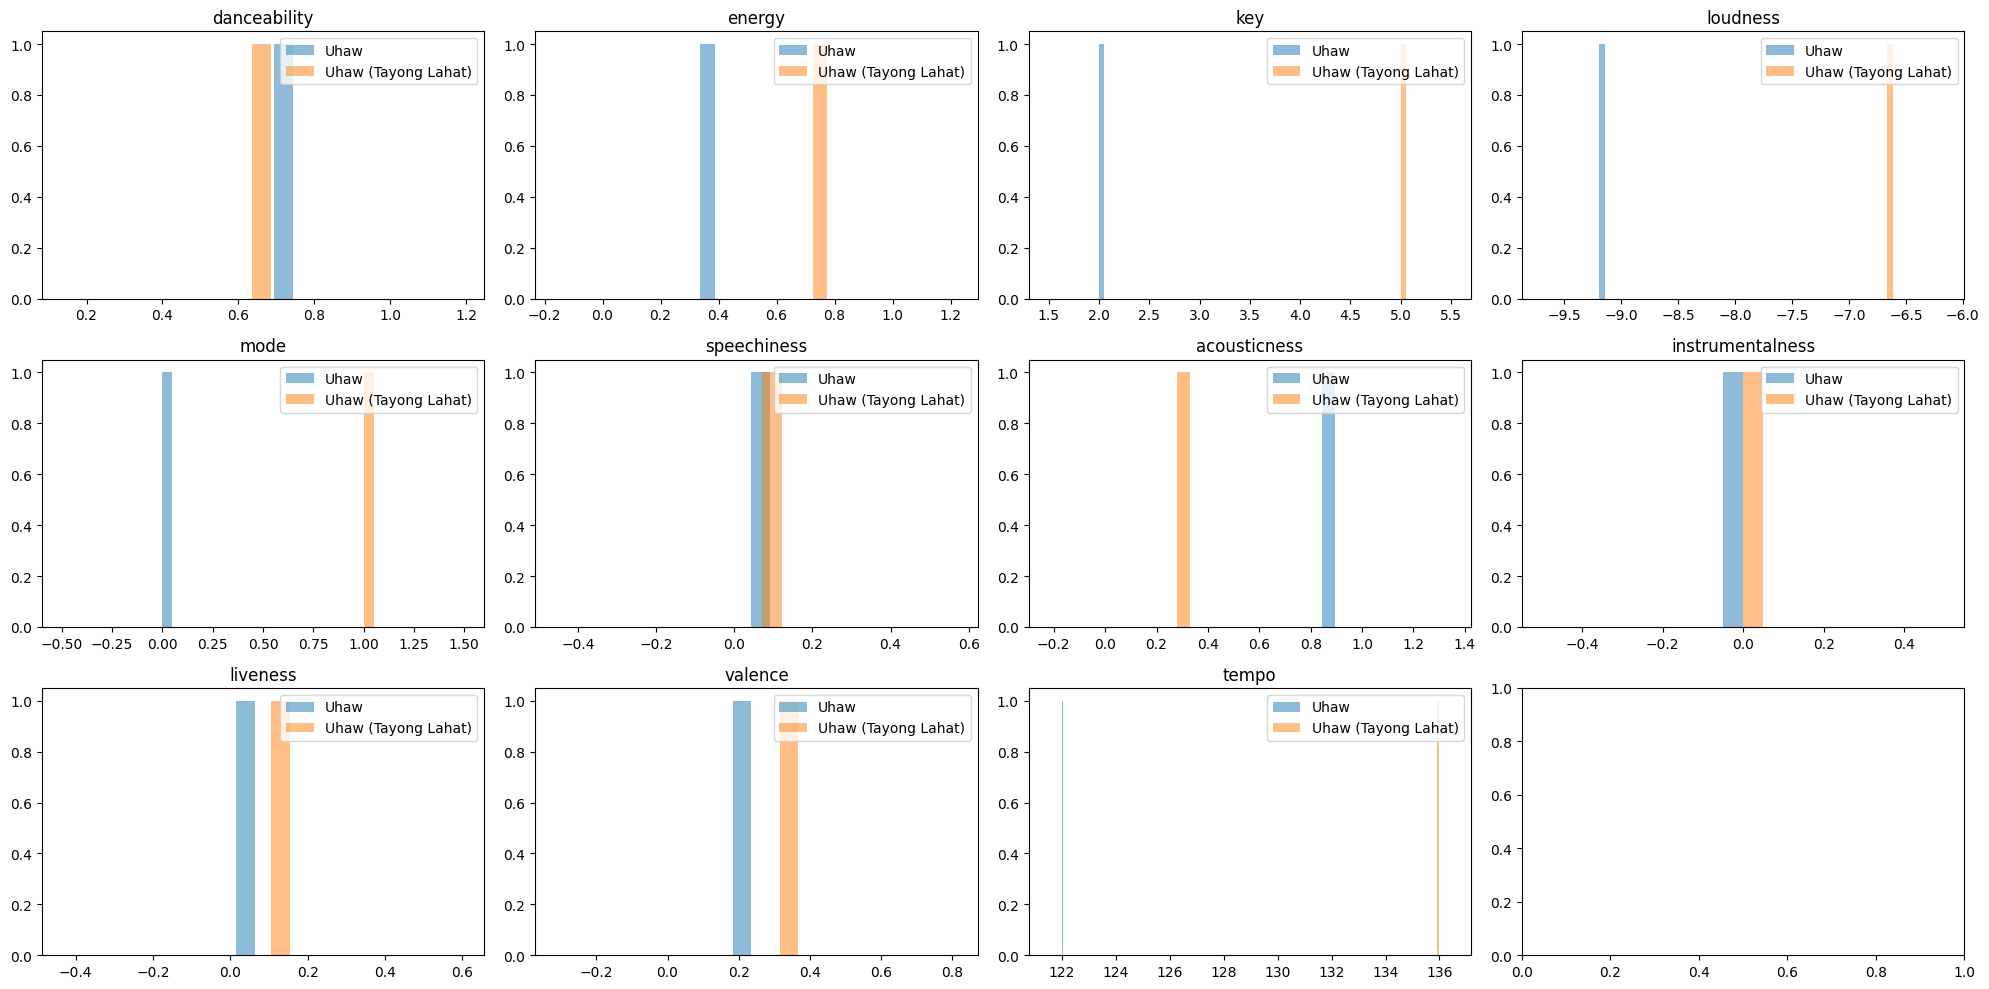

In [9]:
# Create subplots for each audio feature
fig, axs = plt.subplots(3, 4, figsize=(20, 10))
axs = axs.ravel()

# Loop through each audio feature and plot a histogram for "Uhaw" and "Uhaw (Tayong Lahat)"
for i, feature in enumerate(audio_features):
    axs[i].hist(uhaw[feature], bins=20, alpha=0.5, label='Uhaw')
    axs[i].hist(uhaw_tayo[feature], bins=20, alpha=0.5, label='Uhaw (Tayong Lahat)')
    axs[i].set_title(feature)
    axs[i].legend(loc='upper right')

# Adjust spacing between subplots
plt.tight_layout()

# Show plot
plt.show()

In terms of the songs' histogram, the **danceability**, **speechiness**, **instrumentalness**, **liveness**, and **valence** features of the two songs are very close to each other.

There's a bigger gap to the **energy**, **key**, **loudness**, **acousticness** and **tempo** of both songs. 

Summary:
*Uhaw (Tayong Lahat)* is more danceable given its higher measure of intensity and activity (energy) and overall speed or pace (tempo). The song is less acoustic and more loud compared to *Uhaw*. 

### Radar Chart

In [10]:
# # Get mean values of each audio feature for Dilaw
# mean_uhaw = uhaw[audio_features].mean()

# # Create a radar chart
# fig = go.Figure(data=go.Scatterpolar(
#   r=mean_uhaw.values,
#   theta=audio_features,
#   fill='toself'
# ))

# # Set chart title
# fig.update_layout(title='Audio Features of Uhaw')

# # Show plot
# fig.show()

In [11]:
# # Get mean values of each audio feature for Dilaw
# mean_uhaw_tayo = uhaw_tayo[audio_features].mean()

# # Create a radar chart
# fig = go.Figure(data=go.Scatterpolar(
#   r=mean_uhaw_tayo.values,
#   theta=audio_features,
#   fill='toself'
# ))

# # Set chart title
# fig.update_layout(title='Audio Features of Uhaw (Tayong Lahat)')

# # Show plot
# fig.show()

In [12]:
# # Define angles for the radar chart
# angles = np.linspace(0, 2*np.pi, len(audio_features), endpoint=False)

# # Include the last angle for the last feature
# angles = np.concatenate((angles,[angles[0]]))

# # Create a sublot with polar projection
# fig = plt.figure(figsize=(8, 8))
# ax = fig.add_subplot(111, polar=True)

# # Add a plot for "Uhaw"
# values = uhaw[audio_features].values.flatten().tolist()
# values += values[:1]
# ax.plot(angles, values, 'o-', linewidth=2, label="Uhaw")

# # Add a plot for "Uhaw (Tayong Lahat)"
# values = uhaw_tayo[audio_features].values.flatten().tolist()
# values += values[:1]
# ax.plot(angles, values, 'o-', linewidth=2, label="Uhaw (Tayong Lahat)")

# # Fill the area of the plot
# ax.fill(angles, values, alpha=0.25)

# # Set the ticks and labels for the radar chart
# ax.set_xticks(angles[:-1])
# ax.set_xticklabels(audio_features)

# # Add legend
# plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

# # Add title
# plt.title("Audio Features for Uhaw and Uhaw (Tayong Lahat) by Dilaw")

# # Show plot
# plt.show()

The chart shows that there are not much difference in the audio features of Uhaw and Uhaw (Tayong Lahat). The noticeable audio feature is the **tempo** of Uhaw (Tayong Lahat) which is higher than Uhaw.

### Heatmap

In [13]:
# # Combine data for both tracks
# uhaw_vs_uhaw_tayo = pd.concat([uhaw, uhaw_tayo])

# # Create a heatmap of the audio features for "Uhaw" and "Uhaw (Tayong Lahat)"
# ax = sns.heatmap(uhaw_vs_uhaw_tayo[audio_features].transpose(), cmap='coolwarm')

# # Set y-axis tick labels to correspond to the songs
# ax.set_xticklabels(["Uhaw", "Uhaw (Tayong Lahat)"], rotation=0)

# # Add title
# plt.title("Audio Features for Uhaw and Uhaw (Tayong Lahat) by Dilaw")

# # Show plot
# plt.show()

In terms of heatmap, *Uhaw (Tayong Lahat)* is more popular, faster, and more loud compared to *Uhaw*. Other audio features are close to each other.

## Audio Features of Viral Tracks

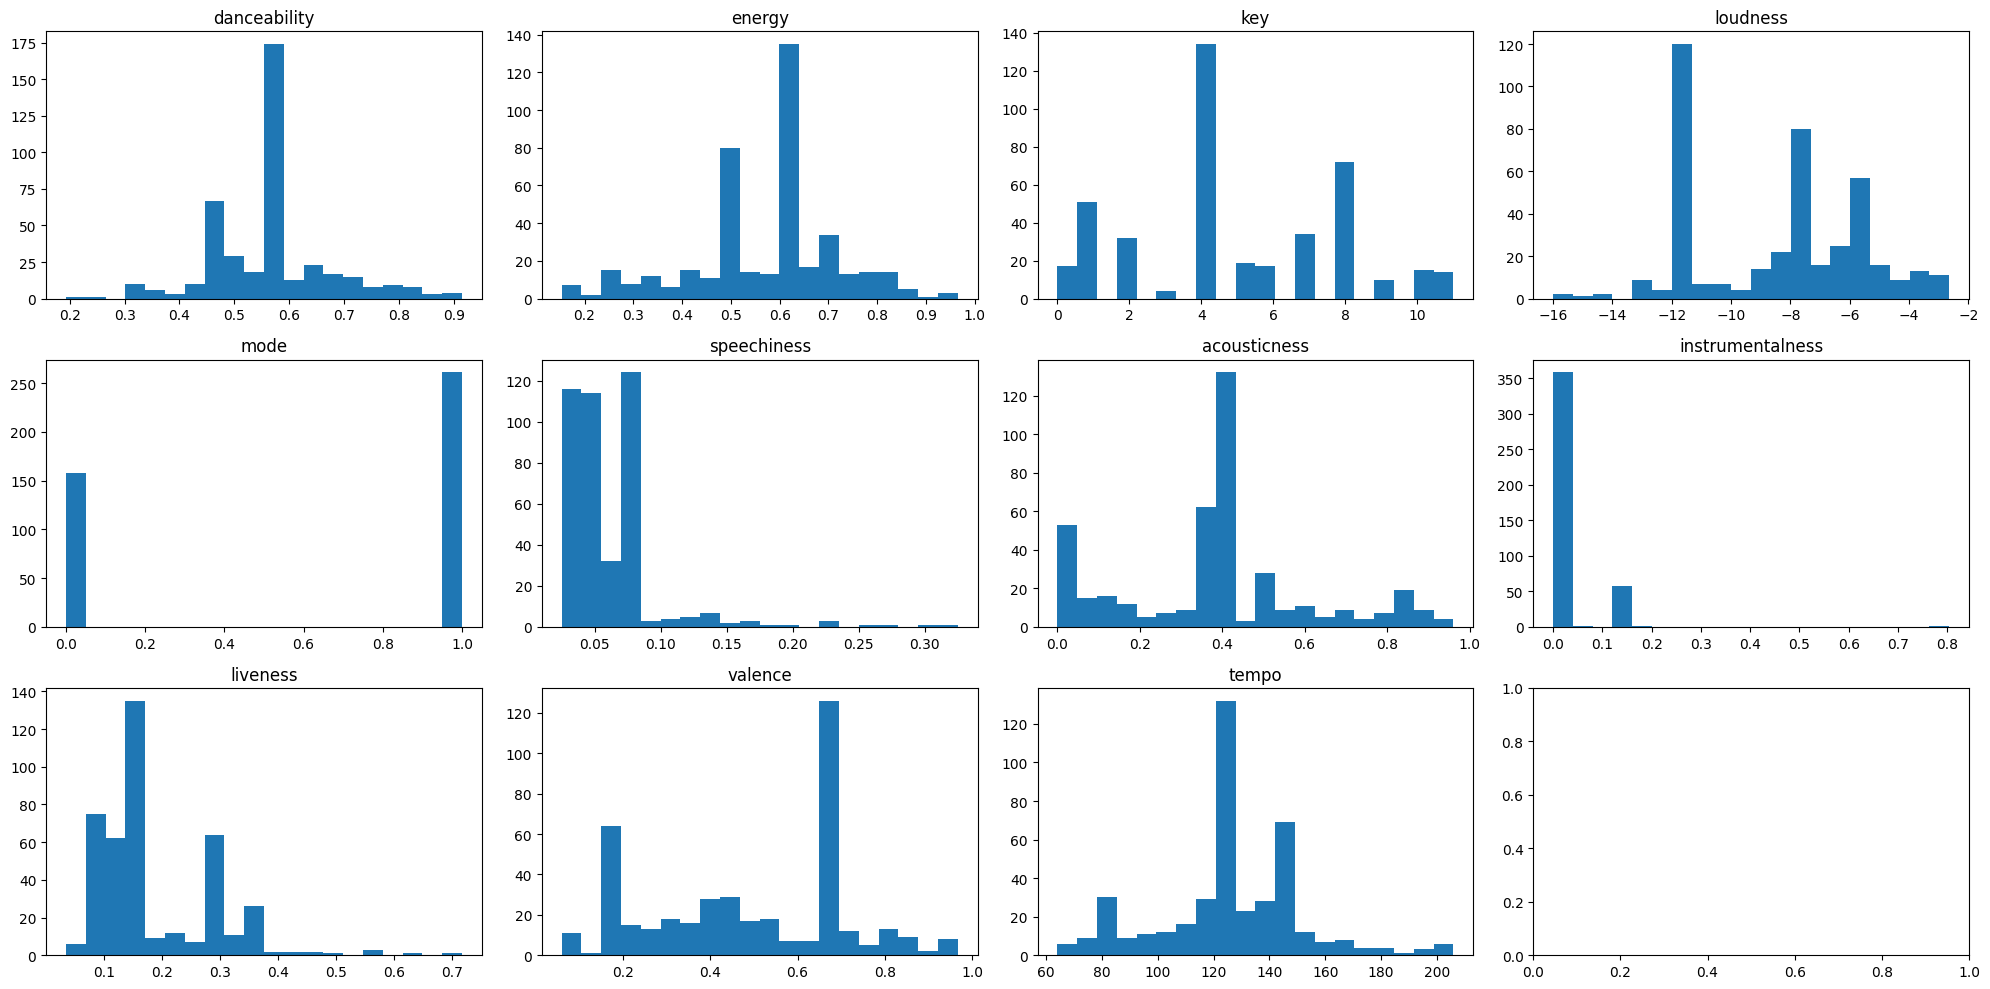

In [14]:
audio_df = merged_df[audio_features]

# Create subplots for each audio feature
fig, axs = plt.subplots(3, 4, figsize=(20, 10))
axs = axs.ravel()

# Loop through each audio feature and plot a histogram for "Uhaw" and "Uhaw (Tayong Lahat)"
for i, feature in enumerate(audio_features):
    axs[i].hist(audio_df[feature], bins=20)
    axs[i].set_title(feature)

# Adjust spacing between subplots
plt.tight_layout()

# Show plot
plt.show()

Most of the viral tracks have the following audio features:
* Danceability: The majority of the tracks have a danceability score of around 0.6. This suggests that the tracks in general are **moderately danceable**.
* Energy: The majority of the tracks have an energy score of around 0.6, indicating a **moderate level of energy**.
* Loudness: The loudness values are highest around -12, suggesting that the tracks are **not extremely loud** but still have a decent volume.
* Speechiness: The majority of the tracks have a low speechiness score of around 0.05, indicating that the tracks **most likely represent music and other non-speech-like tracks**.
* Acousticness: The distribution of acousticness scores is around 0.4, suggesting that the tracks are **not completely acoustic** but also not heavily reliant on electronic instruments.
* Instrumentalness: The instrumentalness values are mostly concentrated around 0, meaning that **most of the tracks have vocals and lyrics**.
* Liveness: The majority of the tracks have a liveness score of around 0.1, indicating that they were **recorded in a studio** rather than in a live performance setting.
* Valence: The valence values are around 0.7, suggesting that the tracks in general have a **positive mood**.
* Tempo: The tempo values are centered around 120 beats per minute, indicating that the tracks have a **moderate tempo**.

## Uhaw vs Viral Track Audio Features

In [15]:
mean_uhaw = uhaw[audio_features].mean()
mean_uhaw

danceability          0.695000
energy                0.337000
key                   2.000000
loudness             -9.196000
mode                  0.000000
speechiness           0.041900
acousticness          0.846000
instrumentalness      0.000165
liveness              0.064300
valence               0.184000
tempo               122.000000
dtype: float64

In [16]:
mean_uhaw_tayo = uhaw_tayo[audio_features].mean()
mean_uhaw_tayo

danceability          0.635000
energy                0.724000
key                   5.000000
loudness             -6.662000
mode                  1.000000
speechiness           0.071600
acousticness          0.280000
instrumentalness      0.000004
liveness              0.105000
valence               0.316000
tempo               135.927000
dtype: float64

In [17]:
mean_viral = merged_df[audio_features].mean()
mean_viral

danceability          0.563012
energy                0.573513
key                   4.935561
loudness             -8.391821
mode                  0.622912
speechiness           0.061911
acousticness          0.387395
instrumentalness      0.020463
liveness              0.183895
valence               0.483630
tempo               126.648897
dtype: float64

In [24]:
dilaw_tracks.head()

,position,track_id,track_name,artist,streams,streams_increase,position_change,viral,artist_id,artist_name,...,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,91,47OFMuRu5lzJHRbtEXPBbs,Uhaw (Tayong Lahat),Dilaw,90213,NaN,NaN,False,6Dp4LInLyMVA2qhRqQ6AGL,Dilaw,...,0.724,5.0,-6.662,1.0,0.0716,0.28,0.000004,0.105,0.316,135.927
1,77,47OFMuRu5lzJHRbtEXPBbs,Uhaw (Tayong Lahat),Dilaw,109480,19267.0,14.0,False,6Dp4LInLyMVA2qhRqQ6AGL,Dilaw,...,0.724,5.0,-6.662,1.0,0.0716,0.28,0.000004,0.105,0.316,135.927
2,50,47OFMuRu5lzJHRbtEXPBbs,Uhaw (Tayong Lahat),Dilaw,128858,19378.0,27.0,False,6Dp4LInLyMVA2qhRqQ6AGL,Dilaw,...,0.724,5.0,-6.662,1.0,0.0716,0.28,0.000004,0.105,0.316,135.927
3,47,47OFMuRu5lzJHRbtEXPBbs,Uhaw (Tayong Lahat),Dilaw,141420,12562.0,3.0,False,6Dp4LInLyMVA2qhRqQ6AGL,Dilaw,...,0.724,5.0,-6.662,1.0,0.0716,0.28,0.000004,0.105,0.316,135.927
4,44,47OFMuRu5lzJHRbtEXPBbs,Uhaw (Tayong Lahat),Dilaw,152589,11169.0,3.0,False,6Dp4LInLyMVA2qhRqQ6AGL,Dilaw,...,0.724,5.0,-6.662,1.0,0.0716,0.28,0.000004,0.105,0.316,135.927


In [26]:
mean_dilaw = dilaw_tracks[audio_features].mean()
mean_dilaw

danceability          0.654535
energy                0.598000
key                   4.023256
loudness             -7.487023
mode                  0.674419
speechiness           0.061930
acousticness          0.464279
instrumentalness      0.000056
liveness              0.091749
valence               0.273023
tempo               131.392628
dtype: float64

### Uhaw songs vs Viral tracks

In [18]:
# Concatenate the two Series objects
mean_audio_features = pd.concat([mean_uhaw, mean_uhaw_tayo, mean_viral], axis=1)
mean_audio_features.columns = ['Uhaw', 'Uhaw (Tayong Lahat)', 'Viral Tracks']

mean_audio_features

,Uhaw,Uhaw (Tayong Lahat),Viral Tracks
danceability,0.695000,0.635000,0.563012
energy,0.337000,0.724000,0.573513
key,2.000000,5.000000,4.935561
loudness,-9.196000,-6.662000,-8.391821
mode,0.000000,1.000000,0.622912
speechiness,0.041900,0.071600,0.061911
acousticness,0.846000,0.280000,0.387395
instrumentalness,0.000165,0.000004,0.020463
liveness,0.064300,0.105000,0.183895
valence,0.184000,0.316000,0.483630


This table shows the mean values of the audio features for "Uhaw," "Uhaw (Tayong Lahat)," and the viral tracks. The higher the value, the more the song reflects that particular audio feature.

* Danceability: **Uhaw and Uhaw (Tayong Lahat) have higher danceability** compared to the viral tracks, which means they are more suitable for dancing.
* Energy: **Uhaw (Tayong Lahat) has a higher energy** compared to Uhaw and the viral tracks, which suggests a higher level of intensity or activity in the music.
* Loudness: **Uhaw (Tayong Lahat) are louder** than the Uhaw and viral tracks on average, which could suggest a higher perceived volume in the music.
* Speechiness: **Uhaw (Tayong Lahat) has a slightly higher speechiness** compared to Uhaw and viral tracks, which could suggest a higher proportion of spoken words or lyrics in the music.
* Acousticness: **Uhaw has a higher acousticness** compared to Uhaw (Tayong Lahat) and the viral tracks, which suggests a higher proportion of acoustic instruments used in the music.
* Instrumentalness: The **viral tracks have higher instrumentalness** compared to Uhaw and Uhaw (Tayong Lahat), which could suggest a higher proportion of instrumental music without vocals.
* Liveness: The **viral tracks have higher liveness** compared to Uhaw and Uhaw (Tayong Lahat), which could suggest a higher proportion of live performances in the music.
* Valence: The **viral tracks have higher valence** compared to Uhaw and Uhaw (Tayong Lahat), which suggests a higher positivity or happiness in the music.
* Tempo: **Uhaw (Tayong Lahat) has a higher tempo** compared to Uhaw and viral tracks, which suggests a faster pace or beat in the music.


Summary:
* Uhaw and Uhaw (Tayong Lahat) have higher danceability, but **Uhaw (Tayong Lahat) has higher energy, loudness, speechiness, and tempo** compared to Uhaw and viral tracks. 
    *  More energetic and intense sound
* **Uhaw has higher acousticness** compared to Uhaw (Tayong Lahat) and the viral tracks. 
    * More acoustic sound
* The **viral tracks have higher instrumentalness, liveness, and valence** compared to Uhaw and Uhaw (Tayong Lahat).

### Dilaw tracks vs Viral tracks

In [27]:
# Concatenate the two Series objects
mean_audio_features_dilaw = pd.concat([mean_dilaw, mean_viral], axis=1)
mean_audio_features_dilaw.columns = ['Dilaw Tracks', 'Viral Tracks']

mean_audio_features_dilaw

,Dilaw Tracks,Viral Tracks
danceability,0.654535,0.563012
energy,0.598000,0.573513
key,4.023256,4.935561
loudness,-7.487023,-8.391821
mode,0.674419,0.622912
speechiness,0.061930,0.061911
acousticness,0.464279,0.387395
instrumentalness,0.000056,0.020463
liveness,0.091749,0.183895
valence,0.273023,0.483630


This table shows the mean values of the audio features for Dilaw tracks and the viral tracks. The higher the value, the more the song reflects that particular audio feature.

* Danceability: **Dilaw tracks have higher danceability** compared to the viral tracks, which means they are more suitable for dancing.
* Energy: **Dilaw tracks have higher energy** compared to viral tracks, which suggests a higher level of intensity or activity in the music.
* Loudness: **Dilaw tracks are louder** than viral tracks on average, which could suggest a higher perceived volume in the music.
* Speechiness: **Dilaw tracks have slightly higher speechiness** compared to viral tracks, which could suggest a higher proportion of spoken words or lyrics in the music.
* Acousticness: **Dilaw tracks have higher acousticness** compared to the viral tracks, which suggests a higher proportion of acoustic instruments used in the music.
* Instrumentalness: The **viral tracks have higher instrumentalness** compared to Dilaw tracks, which could suggest a higher proportion of instrumental music without vocals.
* Liveness: The **viral tracks have higher liveness** compared to Dilaw tracks, which could suggest a higher proportion of live performances in the music.
* Valence: The **viral tracks have higher valence** compared to Dilaw tracks, which suggests a higher positivity or happiness in the music.
* Tempo: **Dilaw tracks have higher tempo** compared to the viral tracks, which suggests a faster pace or beat in the music.


Summary:
* **Dilaw tracks have higher energy, loudness, speechiness, danceability, acousticness and tempo** compared to Uhaw and viral tracks. 
    *  More energetic and intense sound; more acoustic sound
* The **viral tracks have higher instrumentalness, liveness, and valence** compared to Dilaw tracks

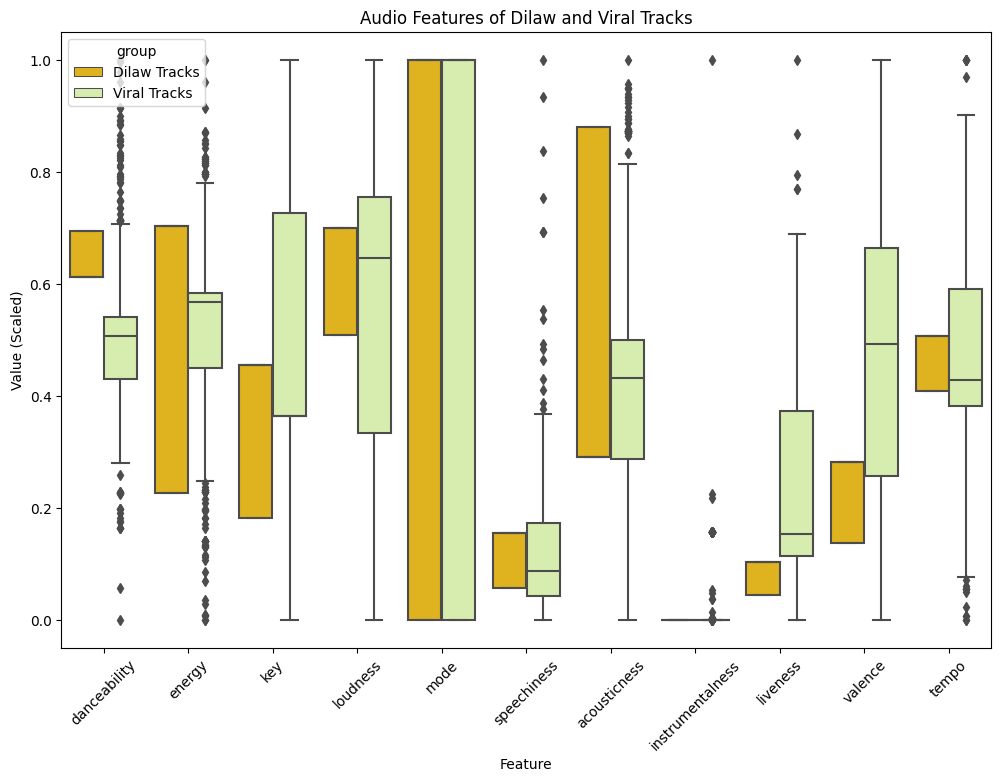

In [22]:
# Select the relevant columns from each dataframe
dilaw_audio_features = dilaw_tracks[['danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo']]
viral_audio_features = merged_df[['danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo']]

# Create the scaler and fit it to the data
scaler = MinMaxScaler()
scaler.fit(pd.concat([dilaw_audio_features, viral_audio_features]))

# Scale the data and add a 'group' column to distinguish between them
dilaw_audio_features = pd.DataFrame(scaler.transform(dilaw_audio_features), columns=dilaw_audio_features.columns)
dilaw_audio_features['group'] = 'Dilaw Tracks'
viral_audio_features = pd.DataFrame(scaler.transform(viral_audio_features), columns=viral_audio_features.columns)
viral_audio_features['group'] = 'Viral Tracks'
audio_features = pd.concat([dilaw_audio_features, viral_audio_features], ignore_index=True)

# Create the box plot
plt.figure(figsize=(12, 8))
sns.boxplot(x='variable', y='value', hue='group', data=pd.melt(audio_features, id_vars=['group']), palette=['#FFC300', '#DAF7A6'])
plt.title('Audio Features of Dilaw and Viral Tracks')
plt.xlabel('Feature')
plt.xticks(rotation=45)
plt.ylabel('Value (Scaled)')
plt.show()
